# Airfare Prediction using Machine Learning

### Problem Definition
Airline ticket prices are influenced by numerous factors, including flight routes, departure and arrival times, airline carriers, and ticket classes. The variability and dynamic nature of these prices present challenges for both travelers seeking the best deals and airlines aiming to optimize revenue.

The goal of this project is to develop a machine learning model that accurately predicts the prices of airline tickets based on historical data provided in the "Flight Price Prediction Dataset." The dataset includes various features such as flight routes, departure and arrival cities, airline carriers, departure and arrival times, and ticket class. By analyzing these features, the model will aim to forecast future ticket prices, providing valuable insights for consumers and aiding airlines in refining their pricing strategies. This project will address the need for accurate airfare predictions and contribute to better decision-making in the travel industry.

### Data
The data is downloaded from Kaggle:
https://www.kaggle.com/datasets/muhammadbinimran/flight-price-prediction

### Data Dictionary:
1. `Airline` - Names of the Airlines
2. `Date_of_Journey` - Date of journey of the flight
3. `Source` - Place of departure; starting point; origin
4. `Destination` - Place of arrival
5. `Route` - The path taken from a source to a destination, which may include specific stops along the way
6. `Dep_Time` - Time of departure from a starting point (source)
7. `Arrival_Time` - Time of arrival at a destination
8. `Duration` - Duration of flight from source to destination
9. `Total_Stops` - Total number of stops between source and destination
10. `Additional_Info` - Meals
11. `Price` - Airfare

# Data Understanding

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the train dataset

> Converting `python string` to `raw string` by adding a prefix `r` to the `pd.read_excel()` string.
<br>
> **Reason:** Different operating systems support either `/` or `\` while reading files. With the prefix `r`, we can use both the types of slashes to read the data file.

In [2]:
train_data = pd.read_excel(r'data/Data_Train.xlsx')

## Exploring the dataset

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Data Preprocessing

## Checking for null values

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data['Total_Stops'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: Total_Stops, dtype: bool

### Fetching only the null records from the `Total_Stops` feature

In [8]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### Fetching only the null records from the `Route` feature

In [9]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


## Dropping null values

> NaN - Not Available Number

Dropping all the null values because there is only 1 record with null values.

In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_data.shape

(10682, 11)

In [13]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

> Like `string` in Python, there exists `object` in Pandas.

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


## Finding the exact memory usage of the dataset

In [15]:
train_data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


## Making a copy of the dataset to perform Exploratory Data Analysis (EDA)

In [16]:
data = train_data.copy()

In [17]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [19]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Converting `Dep_Time`, `Arrival_Time`, and `Date_of_Journey` features into `timestamp` format

> Machine learning cannot work with string data because it performs by utilizing Linear Algebra, Calculus, and Vectors which never work with string data. <br>
> Hence, we need to convert `object` and `string` to `numeric` or `vector` format.
<br><br>
> `timestamp` formats are of two types in Numpy: `datetime64[ns]` and `<m8[ns]`. <br>
> The 'm' in `<m8[ns]` stands for `datetime`, '8' in bytes which stands for `64` bits. Hence, `<m8[ns]` stands for `datetime64[ns]`. '[ns]' stands for `nano seconds`. <br>
> The format of `timestamp` depends on how the Numpy package is compiled.

Creating a function to avoid repitition of the same Lines of Code (LOC).

In [20]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

> Ignoring warnings that may appear in the later LOC

In [21]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [22]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [23]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_Datetime(feature)

In [24]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### Splitting the `Date_of_Journey` feature into derived attributes/features: `Journey_Day`, `Journey_Month`, and `Journey_Year`

> Utilizing the `dt` accessor from pandas in order to access the `datetime` properties of `day`, `month`, and `year`

In [25]:
data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month
data['Journey_Year'] = data['Date_of_Journey'].dt.year

In [26]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-01 05:50:00,2024-08-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


### Extracting derived attributes from `Dep_Time` and `Arrival_Time` features: `Dep_Time_Hour`, `Dep_Time_Minute`, `Arrival_Time_Hour`, and `Arrival_Time_Minute`

In [27]:
def extract_hour_min(df, col):
    df[col+'_Hour'] = df[col].dt.hour
    df[col+'_Minute'] = df[col].dt.minute
    return df.head(3)

In [28]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Journey_Year'],
      dtype='object')

In [29]:
extract_hour_min(data, 'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-01 05:50:00,2024-08-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-01 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [30]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-01 05:50:00,2024-08-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-01 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


### Dropping `Dep_Time` and `Arrival_Time` features because derived attributes have been extracted from them and hence they are of no use.

In [31]:
cols_to_drop = ['Dep_Time', 'Arrival_Time']

data.drop(cols_to_drop, axis=1, inplace=True)

> `axis=1` refers to the column of the dataframe <br>
> `axis=0` refers to the row of the dataframe

In [32]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [33]:
data.shape

(10682, 16)

# When do most of the flights take off?

In [34]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute'],
      dtype='object')

### Defining a function to breakdown `Dep_Time_Hour` into different parts of the day
1. **Early Morning:** 5:00 AM - 8:00 AM
2. **Morning:** 8:00 AM - 12:00 PM
3. **Afternoon:** 12:00 PM - 3:00 PM
4. **Late Afternoon:** 3:00 PM - 6:00 PM
5. **Evening:** 6:00 PM - 9:00 PM
6. **Night:** 9:00 PM - 12:00 AM
7. **Midnight:** 12:00 AM - 1:00 AM
8. **Late Night:** 1:00 AM - 4:00 AM

In [35]:
def flight_dep_time(x):
    if(x>5) and (x<=8):
        return 'Early Morning'
    elif(x>8) and (x<=12):
        return 'Morning'
    elif(x>12) and (x<=15):
        return 'Afternoon'
    elif(x>15) and (x<=18):
        return 'Late Afternoon'
    elif(x>18) and (x<=21):
        return 'Evening'
    elif(x>21) and (x<=24):
        return 'Night'
    elif(x>24) and (x<=1):
        return 'Midnight'
    else:
        return 'Late Night'

### Applying the `flight_dep_time` function to the `Dep_Time_Hour` feature

In [36]:
data['Dep_Time_Hour'].apply(flight_dep_time).head(6)

0             Night
1        Late Night
2           Morning
3    Late Afternoon
4    Late Afternoon
5           Morning
Name: Dep_Time_Hour, dtype: object

### Counting the frequencies of `Dep_Time_Hour`

In [37]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts()

Dep_Time_Hour
Early Morning     2251
Morning           2209
Evening           1710
Late Afternoon    1611
Afternoon         1259
Late Night        1094
Night              548
Name: count, dtype: int64

### Plotting the frequencies into a bar plot

<Axes: xlabel='Dep_Time_Hour'>

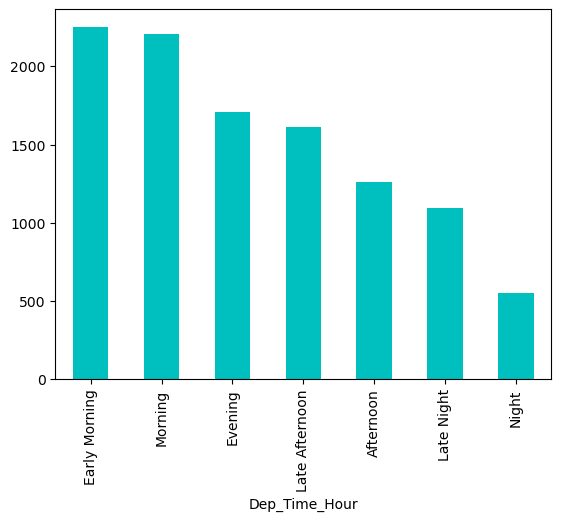

In [38]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts().plot(kind='bar', color='c')

### Utilizing plotly to create an interactive plot of the `Dep_Time_Hour` frequencies

In [39]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

In [40]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

- `go_offline` from `cufflinks.offline` is required to set the plotly plot for offline access within the Jupyter notebook.
- `plot` helps to create matplotlib like visualizations. Creates Plotly plot as an HTML file. It renders the plot offline.
- `iplot` helps to create interactive visualizations (creates javascript plot). Specifically designed for use in Jupyter notebook.
- `init_notebook_mode(connected=True)` helps to initialize the interactive plotting mode in the Jupyter notebook. By setting `connected=True`, plots will be rendered using the Plotly cloud service, which allows for interactive features and better rendering. If set to `connected=False`, the plots will be rendered locally without connecting to Plotly's cloud service.
- `cf.go_offline()` helps to render plots locally within the environment where the code is executed (Jupyter notebook) without requiring an internet connection.

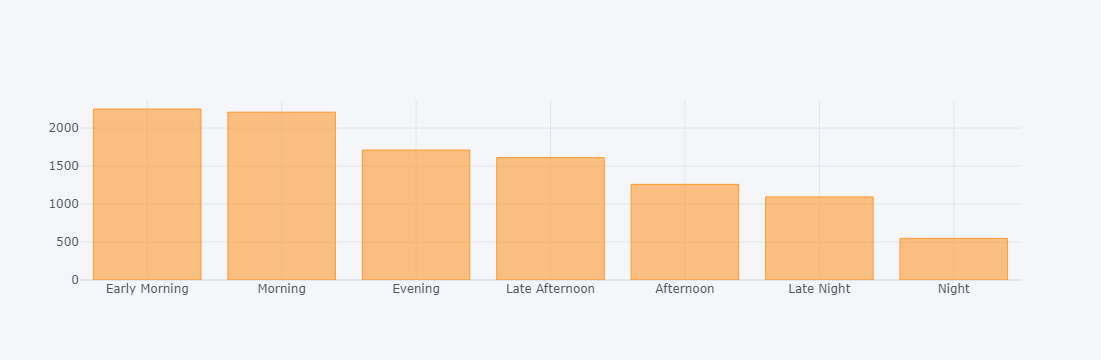

In [41]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

# Data Preprocessing on the `Duration` feature

In [42]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [43]:
data.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_Day                     int32
Journey_Month                   int32
Journey_Year                    int32
Dep_Time_Hour                   int32
Dep_Time_Minute                 int32
Arrival_Time_Hour               int32
Arrival_Time_Minute             int32
dtype: object

## Converting the `Duration` feature from `object` to `numeric` data type
- Some records contain both `hours` and `minutes`, but some contain only one. It is necessary to make these records consistent to convert the `Duration` feature to a numeric form. Hence, all the records will be changed to `hours` and `minutes`.

### Defining a function to normalize the `Duration` feature
- The goal is to normalize all the records in the form: `0h 0m`.
- Hence, records with only `0h` will be appended with `0m` at the end; Records with only `0m` will be appended with `0h` in the front.

In [44]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

### Applying the function to the `Duration` feature

In [45]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [46]:
data['Duration'].head()

0    2h 50m
1    7h 25m
2    19h 0m
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

## Extracting derived attributes from the `Duration` feature: `Duration_Hours` and `Duration_Mins`

- Using `split()` to extract derived attributes
- Using positive indexing and negative indexing to access the numeric values of the string
> How negative indexing works: <br>
> Example: <br><br>
> Positive Indexing: <br>
> `D u r a t i o n` <br>
> `0 1 2 3 4 5 6 7` <br><br>
> Negative Indexing: <br>
> ` D  u  r  a  t  i  o  n` <br>
> `-8 -7 -6 -5 -4 -3 -2 -1`

In [47]:
data['Duration'][0]

'2h 50m'

In [48]:
data['Duration'][0].split(' ')

['2h', '50m']

In [49]:
data['Duration'][0].split(' ')[0]

'2h'

In [50]:
data['Duration'][0].split(' ')[1]

'50m'

> Accessing only the numeric value by excluding the string `h` or `m` using: <br>
> `[0:-1]`.<br>
> where Python excludes the index `-1` and only includes the indexes `[0:]`.

In [51]:
data['Duration'][0].split(' ')[0][0:-1]

'2'

In [52]:
data['Duration'][0].split(' ')[1][0:-1]

'50'

> Using `type()` to check the data type

In [53]:
type(data['Duration'][0].split(' ')[0][0:-1])

str

> Since the data type of the extracted numeric value is `string`, `int()` function will be used to convert it to integer.

In [54]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [55]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

### Creating and applying lambda function to the `Duration` feature in order to extract the derived attributes

> The `x` in the lambda function will be treated as a pointer to each row/record in the `Duration` feature.

In [56]:
data['Duration_Hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [57]:
data['Duration_Mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [58]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


# Does the duration of a flight have any impact on airfare?

In [59]:
data.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_Day                     int32
Journey_Month                   int32
Journey_Year                    int32
Dep_Time_Hour                   int32
Dep_Time_Minute                 int32
Arrival_Time_Hour               int32
Arrival_Time_Minute             int32
Duration_Hours                  int64
Duration_Mins                   int64
dtype: object

### Converting the values in the `Duration` feature from hours to minutes

> The current form of values in the `Duration` feature is `0h 0m` <br><br>
> `0h 0m` can be converted to minutes as follows: <br>
> `0h*60 + 0m*1`
> <br><br>
> How it will be implemented: <br>
> `h` will be replaced with `*60`, and <br>
> `m` will be replaced with `*1`
> <br><br>
> However, the `Duration` feature is of the datatype `object` or `string`. Hence, the `eval()` function can be utilized to perform arithmetic operations on string values.

In [60]:
'2*60'

'2*60'

In [61]:
eval('2*60')

120

In [62]:
data['Duration'].head(6)

0    2h 50m
1    7h 25m
2    19h 0m
3    5h 25m
4    4h 45m
5    2h 25m
Name: Duration, dtype: object

> Utilizing the `str` accessor and the `replace` function to replace specific characters from the string values in the `Duration` feature:<br>
> `'h'` -> `'*60'`<br>
> `' '` -> `'+'`<br>
> `'m'` -> `'*1'`
>
> Finally storing it in `Duration_In_Mins`

In [63]:
data['Duration_In_Mins'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1')

In [64]:
data['Duration_In_Mins'].head(6)

0    2*60+50*1
1    7*60+25*1
2    19*60+0*1
3    5*60+25*1
4    4*60+45*1
5    2*60+25*1
Name: Duration_In_Mins, dtype: object

> Applying the `eval()` function to perform arithmetic operations on the string values

In [65]:
data['Duration_In_Mins'] = data['Duration_In_Mins'].apply(eval)

In [66]:
data['Duration_In_Mins'].head(6)

0     170
1     445
2    1140
3     325
4     285
5     145
Name: Duration_In_Mins, dtype: int64

In [67]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute', 'Duration_Hours',
       'Duration_Mins', 'Duration_In_Mins'],
      dtype='object')

### Creating a scatter plot to visualize the impact of flight duration on airfare

<Axes: xlabel='Duration_In_Mins', ylabel='Price'>

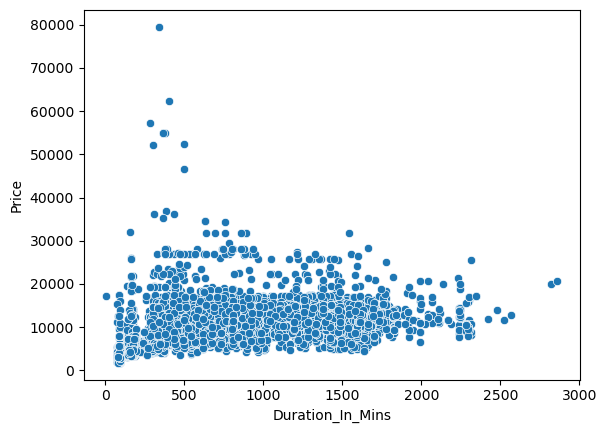

In [68]:
sns.scatterplot(x='Duration_In_Mins', y='Price', data=data)

### Visualizing the same scatter plot with a hue of `Total_Stops` feature

<Axes: xlabel='Duration_In_Mins', ylabel='Price'>

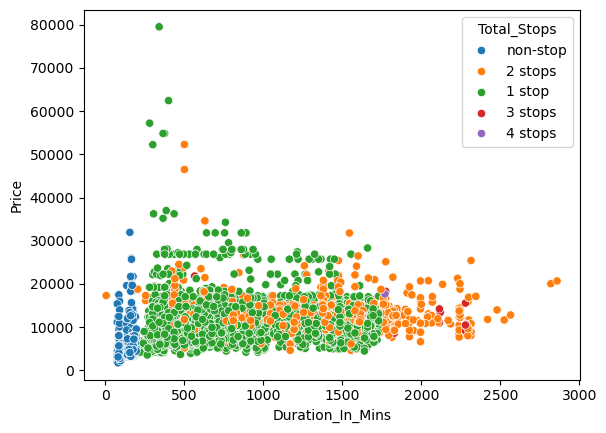

In [69]:
sns.scatterplot(x='Duration_In_Mins', y='Price', hue='Total_Stops', data=data)

### Visualizing the same using regression plot with a best-fit line

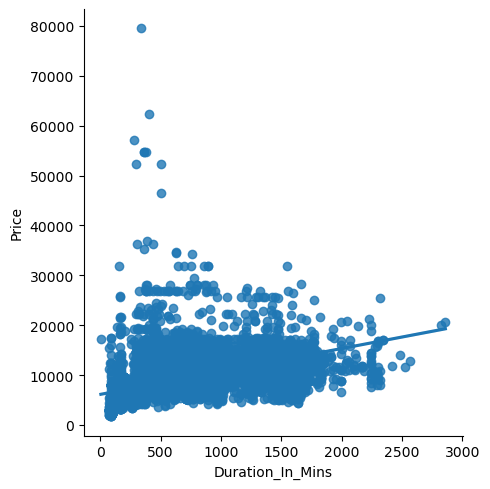

In [70]:
sns.lmplot(x='Duration_In_Mins', y='Price', data=data)

> The best-fit line on the regression plot, clearly increases, inferring that as the flight duration increases, the price or the airfare also increases.

# Which is the most common route in Jet Airways?

In [71]:
data['Airline'].head(6)

0         IndiGo
1      Air India
2    Jet Airways
3         IndiGo
4         IndiGo
5       SpiceJet
Name: Airline, dtype: object

In [72]:
data['Airline'] == 'Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [73]:
data[data['Airline'] == 'Jet Airways'].head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins,Duration_In_Mins
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30,930
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5,21,5,1265
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25,25,30,1530


In [74]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

# Airline vs Price Analysis

In [75]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute', 'Duration_Hours',
       'Duration_Mins', 'Duration_In_Mins'],
      dtype='object')

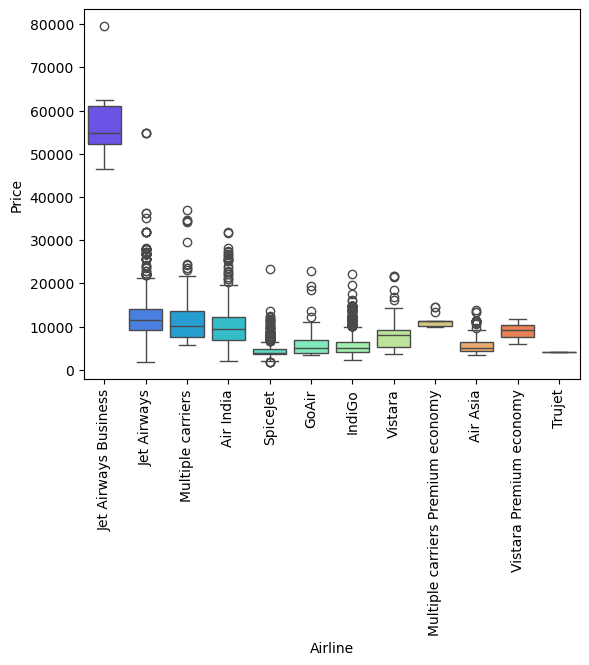

In [94]:
sns.boxplot(x='Airline', y='Price', data=data.sort_values('Price', ascending=False), palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()